# Linear Regression from Scratch vs. scikit-learn

## Project Overview

This notebook demonstrates how to implement multivariate linear regression from scratch and compare its performance with scikit-learn’s `LinearRegression` on a real-world dataset. We use the "Life Expectancy Data.csv" dataset to predict life expectancy based on various features. The notebook includes exploratory data analysis (EDA) and discusses the business value of the project.

## 1. Exploratory Data Analysis (EDA)

Before modeling, let's explore the dataset to understand its structure, missing values, and relationships between variables. This helps us make informed decisions during preprocessing and feature selection.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

None

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Missing values per column:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


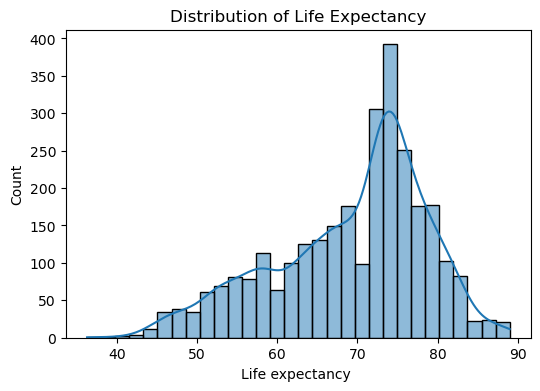

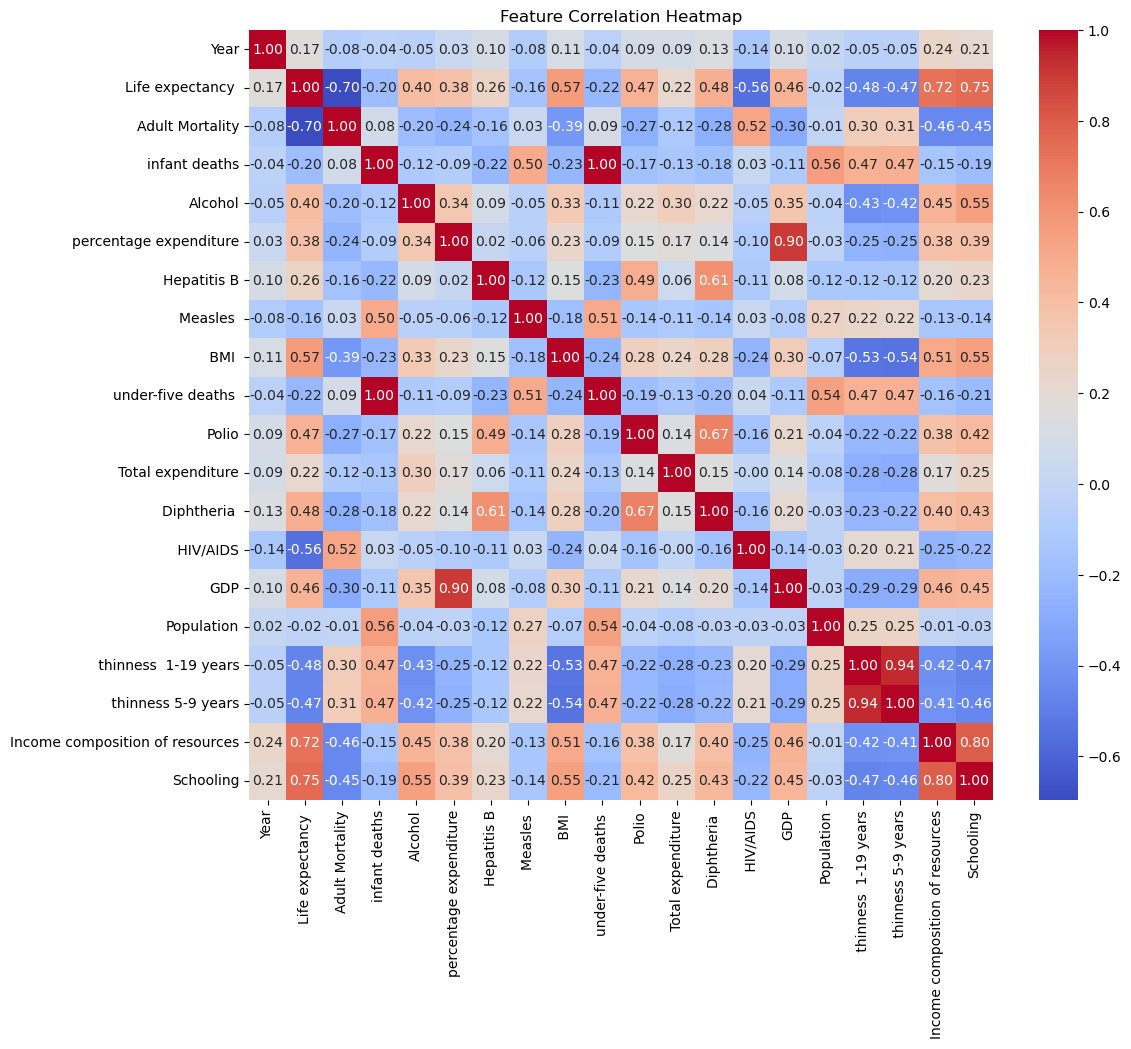

In [ ]:
# Load the dataset for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Update the path and target column
data_path =  "Life Expectancy Data.csv"
target_col = 'Life expectancy '  # Note the space at the end

try:
    data = pd.read_csv(data_path)
except FileNotFoundError:
    raise FileNotFoundError(f"File '{data_path}' not found. Please ensure the dataset is in the working directory.")

# Display basic info
display(data.head())
display(data.info())
display(data.describe())

# Check for missing values
missing = data.isnull().sum()
print("Missing values per column:\n", missing)

# Visualize the distribution of the target variable
plt.figure(figsize=(6,4))
sns.histplot(data[target_col], kde=True)
plt.title('Distribution of Life Expectancy')
plt.show()

# Correlation heatmap (only for numeric columns)
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Value of the Project

Accurate life expectancy prediction is valuable for public health officials, policymakers, and researchers. It helps in:
- Identifying key health and socio-economic drivers of life expectancy
- Guiding resource allocation and policy interventions
- Monitoring and improving population health outcomes

By comparing a custom implementation with a standard library, we also gain deeper insight into the mechanics of linear regression and model evaluation.

## 2. Import Required Libraries

We import all necessary libraries for data manipulation, visualization, model building, and evaluation.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SkLinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time 
%matplotlib inline

## 3. Data Loading and Preprocessing

We drop categorical columns, fill missing values with the mean, and split the data for training and testing.

In [41]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Drop categorical columns from the dataset
X = data.drop(columns=[target_col])
X_nocat = X.drop(columns=categorical_cols)

# Handle missing values (simple imputation: fill with mean)
X_nocat = X_nocat.fillna(X_nocat.mean())
y = data[target_col].values
y = np.where(np.isnan(y), np.nanmean(y), y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_nocat.values, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Linear Regression Implementation

We implement linear regression from scratch using gradient descent and track the training loss.

In [42]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def _initialize_parameters(self, n_features):
        """Initialize weights and bias."""
        self.weights = np.random.randn(n_features, 1) * 0.01
        self.bias = 0
    
    def fit(self, X, y):
        """Train the model using gradient descent."""
        n_samples, n_features = X.shape
        self._initialize_parameters(n_features)
        
        for _ in range(self.n_iter):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y.reshape(-1, 1)))
            db = (1 / n_samples) * np.sum(y_pred - y.reshape(-1, 1))
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Compute and store loss
            loss = np.mean((y_pred - y.reshape(-1, 1)) ** 2)
            self.loss_history.append(loss)
    
    def predict(self, X):
        """Make predictions."""
        return np.dot(X, self.weights) + self.bias
    
    def evaluate(self, X_test, y_test):
        """Compute MSE and R²."""
        y_pred = self.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return mse, r2

### Train and Evaluate Custom Linear Regression Model

In [43]:
custom_model = LinearRegression(learning_rate=0.01, n_iter=1000)
custom_model.fit(X_train, y_train)
custom_mse, custom_r2 = custom_model.evaluate(X_test, y_test)
print(f"Custom Model - MSE: {custom_mse:.4f}, R²: {custom_r2:.4f}")

Custom Model - MSE: 16.3601, R²: 0.8112


### Train and Evaluate scikit-learn Linear Regression Model

In [44]:
# Train scikit-learn model
sk_model = SkLinearRegression()
sk_model.fit(X_train, y_train)
sk_pred = sk_model.predict(X_test)
sk_mse = mean_squared_error(y_test, sk_pred)
sk_r2 = r2_score(y_test, sk_pred)
print(f"scikit-learn - MSE: {sk_mse:.4f}, R²: {sk_r2:.4f}")

scikit-learn - MSE: 15.3609, R²: 0.8227


### Compare Model Coefficients

We compare the learned coefficients from both models to see if they are similar.

In [45]:
# Use X_nocat.columns as the feature names, since that's what was used for training
feature_names = list(X_nocat.columns) + ["Intercept"]
custom_coefs = np.vstack([custom_model.weights, custom_model.bias]).flatten()
sk_coefs = np.append(sk_model.coef_.flatten(), sk_model.intercept_)

coefficients = pd.DataFrame({
    "Feature": feature_names,
    "Custom Model": custom_coefs,
    "scikit-learn": sk_coefs
})
print(coefficients)

                            Feature  Custom Model  scikit-learn
0                              Year     -0.049177     -0.028457
1                   Adult Mortality     -2.691564     -2.649419
2                     infant deaths      0.283202     10.817481
3                           Alcohol      0.332728      0.457691
4            percentage expenditure      0.264246      0.224618
5                       Hepatitis B     -0.424827     -0.380865
6                          Measles      -0.411301     -0.279055
7                              BMI       0.812025      0.786777
8                under-five deaths      -0.451236    -10.981840
9                             Polio      0.728933      0.650194
10                Total expenditure      0.165895      0.147295
11                      Diphtheria       1.077664      0.957360
12                         HIV/AIDS     -2.482518     -2.433248
13                              GDP      0.404155      0.491650
14                       Population     

### Visualize Training Loss Curve

Plotting the loss curve helps us understand the convergence of the custom model.

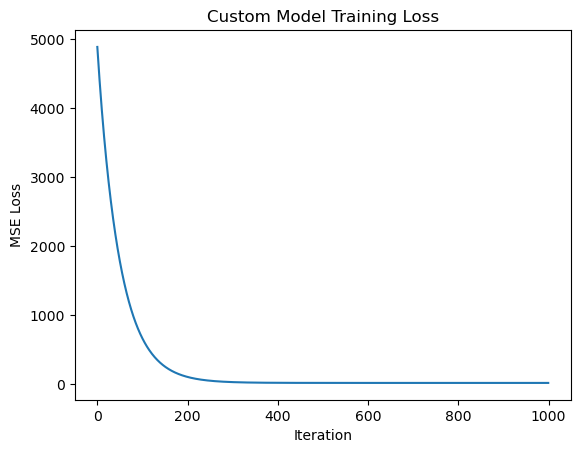

In [46]:
plt.plot(range(len(custom_model.loss_history)), custom_model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Custom Model Training Loss")
plt.show()

### Prediction Comparison

We compare the predictions of both models against the true values.

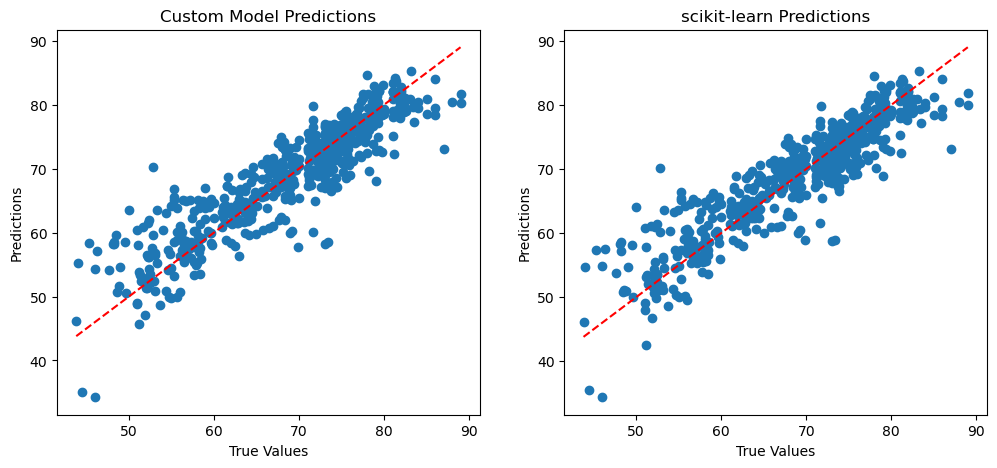

In [47]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, custom_model.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Custom Model Predictions")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1, 2, 2)
plt.scatter(y_test, sk_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("scikit-learn Predictions")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

### Check Working Directory

This helps ensure the notebook is running in the expected directory for file loading.

In [ ]:
import os
print(os.getcwd())